# Comparando especies de árboles en parques y veredas

Este ejercicio forma parte del curso *Programación en Python* dictado por la Escuela de Ciencia y Tecnología de la Universidad Nacional de San Martín (ECyT-UNSAM) durante el primer cuatrimestre de 2021.

**Consigna.** Hacer un función para comparar el diámetro y la altura de una misma especie en dos entornos distintos: parques y veredas de la Ciudad Autónoma de Buenos Aires.

**Data**. Ambos datasets contienen información sobre altura, diámetro, inclinación, nombre científico, ubicación, origen, calle o parque en el que se ubica el árbol, entre otros.

In [1]:
# Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def arbolado_parques_veredas(nombre_ambiente1, nombre_ambiente2):
    #1. Abrí ambos datasets.
    df_veredas = pd.read_csv("arbolado-publico-lineal-2017-2018.csv", low_memory = False)
    df_parques = pd.read_csv("arbolado-en-espacios-verdes.csv", low_memory = False)
    
    #2. Para cada dataset armá otro seleccionando solamente las filas correspondientes a la especie 
    # de interés y las columnas correspondientes al diámetro y altura del árbol.
    # Renombrá las columnas de altura y diámetro para que se llamen igual en ambos dataframes.
    nom_especie = [nombre_ambiente1, nombre_ambiente2]
    cols = ["altura_arbol", "diametro_altura_pecho"]
    
    df_especie_veredas = df_veredas.loc[df_veredas["nombre_cientifico"].isin(nom_especie), cols].copy()
    df_parques = df_parques.rename(columns = {"altura_tot": "altura_arbol", "diametro": "diametro_altura_pecho"})
    df_especie_parques = df_parques.loc[df_parques["nombre_cie"].isin(nom_especie), cols].copy()
    
    #3. Agregá a cada dataframe una columna llamada 'ambiente' que en un caso valga 'parque' 
    # y en el otro caso 'vereda'.
    df_especie_veredas["ambiente"] = "vereda"
    df_especie_parques["ambiente"] = "parque"
    
    #4. Juntá ambos datasets.
    df_especie = pd.concat([df_especie_parques, df_especie_veredas])
    
    #5. Creá un boxplot para los diámetros y otro para las alturas distinguiendo los ambientes.
    sns.boxplot(data = df_especie, x = "ambiente", y = "diametro_altura_pecho", width = 0.3, palette = "Greens_r") 
    plt.title(f"Comparación Diámetro - {nom_especie[0]}")
    plt.show()
    sns.boxplot(data = df_especie, x = "ambiente", y = "altura_arbol", width = 0.3, palette = "Greens_r") 
    plt.title(f"Comparación Altura - {nom_especie[0]}")
    plt.show()

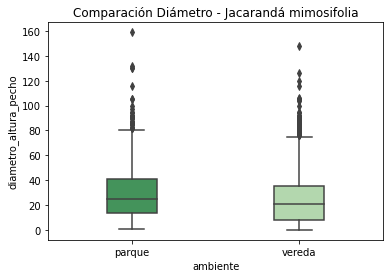

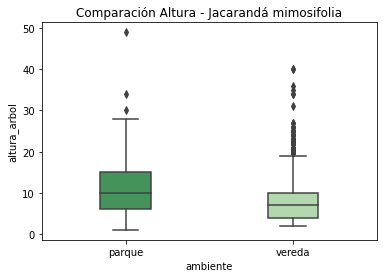

In [3]:
arbolado_parques_veredas('Jacarandá mimosifolia', 'Jacaranda mimosifolia')

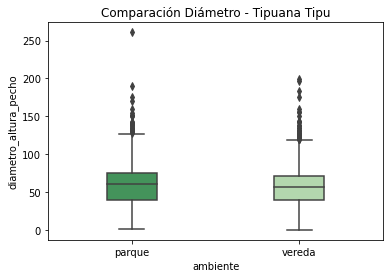

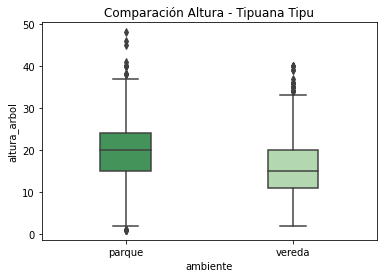

In [4]:
arbolado_parques_veredas('Tipuana Tipu', 'Tipuana tipu')